<a href="https://colab.research.google.com/github/Remonah-3/Github_Assignment/blob/master/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iteration 0, Loss: 0.6931
Iteration 100, Loss: 0.4143
Iteration 200, Loss: 0.3088
Iteration 300, Loss: 0.2555
Iteration 400, Loss: 0.2237
Iteration 500, Loss: 0.2027
Iteration 600, Loss: 0.1879
Iteration 700, Loss: 0.1769
Iteration 800, Loss: 0.1684
Iteration 900, Loss: 0.1617

Metrics on Test Set:
Accuracy: 0.85
Precision: 0.7272727272727273
Recall: 1.0


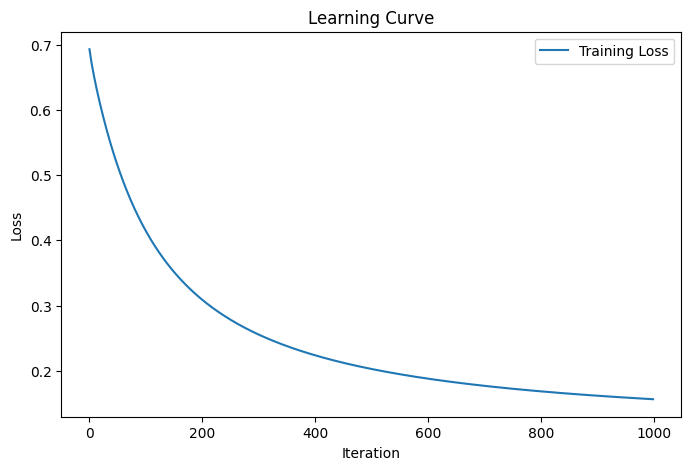

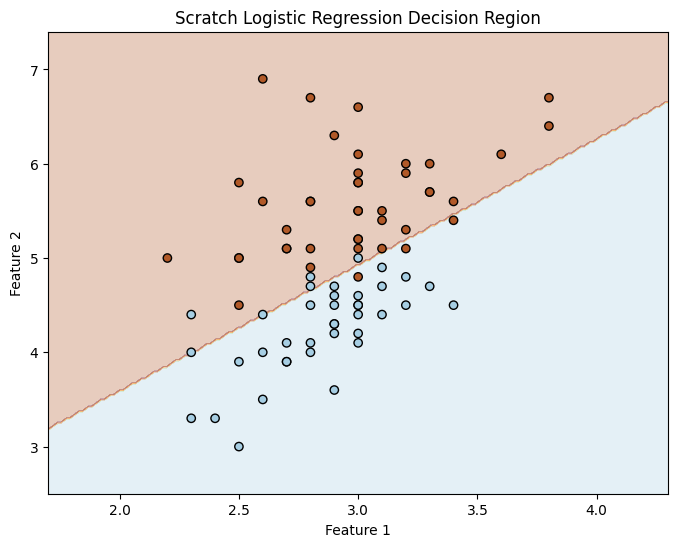

Weights saved to iris_logistic_weights.npz
Weights loaded from iris_logistic_weights.npz


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Scratch Logistic Regression Class

class ScratchLogisticRegression:
    def __init__(self, num_iter=1000, lr=0.01, bias=True, verbose=False, reg_lambda=0.0):
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.reg_lambda = reg_lambda
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    # Sigmoid function
    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    # Training with gradient descent
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.coef_ = np.zeros(n_features)
        if self.bias:
            self.intercept_ = 0

        for i in range(self.iter):
            linear_model = np.dot(X, self.coef_)
            if self.bias:
                linear_model += self.intercept_

            y_pred = self._sigmoid(linear_model)
            error = y_pred - y

            grad = (np.dot(X.T, error) / n_samples) + (self.reg_lambda / n_samples) * self.coef_
            if self.bias:
                grad_intercept = np.sum(error) / n_samples

            self.coef_ -= self.lr * grad
            if self.bias:
                self.intercept_ -= self.lr * grad_intercept

            loss_reg = (self.reg_lambda / (2 * n_samples)) * np.sum(self.coef_ ** 2)
            self.loss[i] = -np.mean(y * np.log(y_pred + 1e-15) + (1 - y) * np.log(1 - y_pred + 1e-15)) + loss_reg

            if self.verbose and i % 100 == 0:
                print(f"Iteration {i}, Loss: {self.loss[i]:.4f}")

    # Predict probabilities
    def predict_proba(self, X):
        linear_model = np.dot(X, self.coef_)
        if self.bias:
            linear_model += self.intercept_
        return self._sigmoid(linear_model)

    # Predict binary labels
    def predict(self, X):
        prob = self.predict_proba(X)
        return (prob >= 0.5).astype(int)

    # Save weights
    def save_weights(self, filename="logistic_weights.npz"):
        if self.bias:
            np.savez(filename, coef=self.coef_, intercept=self.intercept_)
        else:
            np.savez(filename, coef=self.coef_)
        print(f"Weights saved to {filename}")

    # Load weights
    def load_weights(self, filename="logistic_weights.npz"):
        data = np.load(filename)
        self.coef_ = data['coef']
        if self.bias and 'intercept' in data:
            self.intercept_ = data['intercept']
        print(f"Weights loaded from {filename}")

# Plot Decision Regions

def plot_decision_regions(X, y, model, title="Decision Region"):
    x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
    y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid).reshape(xx.shape)

    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(title)
    plt.show()

# Example: Iris Binary Classification

iris = load_iris()
X = iris.data
y = iris.target

# Only two classes: versicolor (1) vs virginica (2)
mask = y != 0
X = X[mask]
y = y[mask]
y = (y == 2).astype(int)  # virginica = 1, versicolor = 0

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Scratch Logistic Regression
model = ScratchLogisticRegression(num_iter=1000, lr=0.1, verbose=True, reg_lambda=0.1)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("\nMetrics on Test Set:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

# Plot Learning Curve

plt.figure(figsize=(8,5))
plt.plot(range(model.iter), model.loss, label="Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.legend()
plt.show()

# Decision Region (2 features)

X_vis = X_train[:, [1, 2]]  # select 2 features
y_vis = y_train

# Retrain on 2 features for plotting
model_2f = ScratchLogisticRegression(num_iter=1000, lr=0.1, verbose=False, reg_lambda=0.1)
model_2f.fit(X_vis, y_vis)
plot_decision_regions(X_vis, y_vis, model_2f, title="Scratch Logistic Regression Decision Region")

# Save/Load Example

model_2f.save_weights("iris_logistic_weights.npz")
new_model = ScratchLogisticRegression(num_iter=1000, lr=0.1)
new_model.load_weights("iris_logistic_weights.npz")
